In [78]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import cv2
#import json
#import xmltodict
#import xml.etree.ElementTree as ET
import pandas as pd
import re

In [4]:
import importlib
import utils

In [5]:
importlib.reload(utils)
from utils import get_boxes_texts, get_boxes_classes_xml, plot_all_boxes, get_boxes_classes_txt

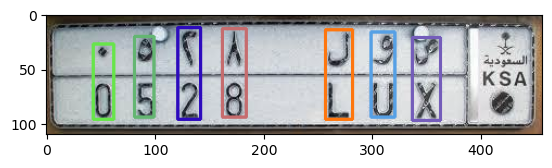

In [73]:
train_dir = 'GBC_CV_attitude_test_2023_10/test_task/train'
test_dir = 'GBC_CV_attitude_test_2023_10/test_task/test'

directories = {'train':  train_dir,
              'test': test_dir}

ann_file = 'ckictsenl0000246a2itn28ts.txt'
pic = cv2.imread(os.path.join(train_dir, ann_file.replace('.txt', '.jpeg')))
with open(os.path.join(train_dir, ann_file), 'r') as f:
    ann_data = f.readlines()
boxes, classes = get_boxes_classes_txt(ann_data)
pic_vis = plot_all_boxes(pic, boxes, classes)
plt.imshow(pic_vis)

In [9]:
train_anns = glob.glob( os.path.join(train_dir, '*.txt') )
test_anns = glob.glob( os.path.join(test_dir, '*.txt') )

In [10]:
DF = pd.DataFrame(columns = ['DS_part', 'ann_file', 'class', 'x1', 'y1', 'x2', 'y2'])
row_n=0
for DS_part in directories:
    anns = glob.glob(os.path.join(directories[DS_part], '*.txt') )
    for ann_file in anns:
        with open( ann_file, 'r') as f:
            ann_data = f.readlines()
        boxes, classes = get_boxes_classes_txt(ann_data)
        for box, cl in zip(boxes, classes):
            x1, y1, x2, y2 = box
            DF.loc[row_n]=[DS_part, ann_file, int(cl), x1, y1, x2, y2]
            row_n+=1
        #print(ann_data, )

In [11]:
print(row_n, DF.shape) 
DF

3827 (3827, 7)


,DS_part,ann_file,class,x1,y1,x2,y2
0,train,GBC_CV_attitude_test_2023_10/test_task/train\c...,0,0.094092,0.254545,0.135667,0.872727
1,train,GBC_CV_attitude_test_2023_10/test_task/train\c...,5,0.177243,0.190909,0.218818,0.863636
2,train,GBC_CV_attitude_test_2023_10/test_task/train\c...,2,0.264770,0.118182,0.312910,0.872727
3,train,GBC_CV_attitude_test_2023_10/test_task/train\c...,8,0.354486,0.118182,0.402626,0.863636
4,train,GBC_CV_attitude_test_2023_10/test_task/train\c...,18,0.562363,0.136364,0.617068,0.872727
...,...,...,...,...,...,...,...
3822,test,GBC_CV_attitude_test_2023_10/test_task/test\ck...,10,0.738095,0.245902,0.821429,0.901639
3823,test,GBC_CV_attitude_test_2023_10/test_task/test\ck...,8,0.114035,0.020408,0.201754,0.938776
3824,test,GBC_CV_attitude_test_2023_10/test_task/test\ck...,8,0.210526,0.020408,0.298246,0.938776
3825,test,GBC_CV_attitude_test_2023_10/test_task/test\ck...,8,0.307018,0.061224,0.394737,0.959184


## classes_distribution

In [12]:
tr_freq = DF[DF['DS_part']=='train'].groupby(by = 'class')['DS_part'].count().reset_index()
te_freq = DF[DF['DS_part']=='test'].groupby(by = 'class')['DS_part'].count().reset_index()
#tr_freq = DF[DF['DS_part']=='train'].groupby(by = 'class').agg('DS_part', count).reset_index()
tr_freq.shape, te_freq.shape

((27, 2), (26, 2))

In [13]:
#te_freq.head()
[x for x in list(tr_freq['class']) if x not in list(te_freq['class'])] 

[22]

<Axes: xlabel='class'>

<Figure size 1200x800 with 0 Axes>

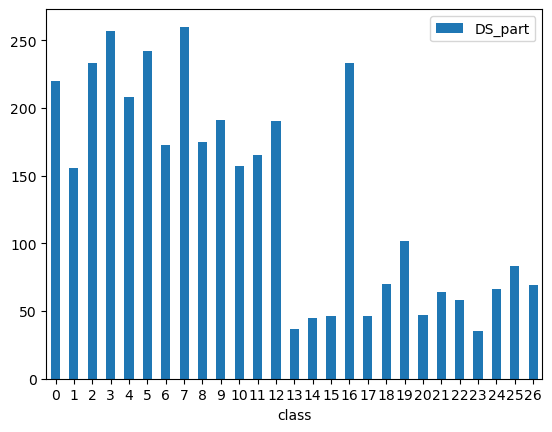

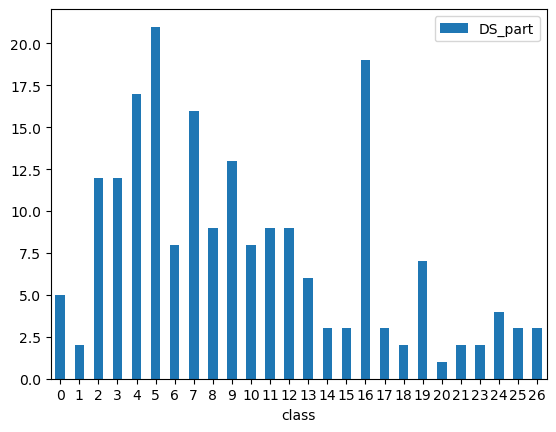

In [14]:
figure = plt.figure(figsize = (12,8))
#ax1 = 
#plt.subplot(1,2,1)
#ax1 = tr_freq.plot.bar(x='class', y='DS_part', rot=0)
tr_freq.plot.bar(x='class', y='DS_part', rot=0)

#ax2 = 
#plt.subplot(1, 2, 2)
#ax2 = te_freq.plot.bar(x='class', y='DS_part', rot=0)
te_freq.plot.bar(x='class', y='DS_part', rot=0)

In [15]:
#there are some minor classes but the is inbalance is not critical

## number of symbols per picture

In [16]:
tr_symb_freq = DF[DF['DS_part']=='train'].groupby(by = 'ann_file')['DS_part'].count().reset_index()
te_symb_freq = DF[DF['DS_part']=='test'].groupby(by = 'ann_file')['DS_part'].count().reset_index()

In [17]:
tr_symb_freq

,ann_file,DS_part
0,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
1,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
2,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
3,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
4,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
...,...,...
558,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
559,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
560,GBC_CV_attitude_test_2023_10/test_task/train\c...,7
561,GBC_CV_attitude_test_2023_10/test_task/train\c...,7


In [76]:
#np.array(tr_symb_freq['DS_part'].reset_index())
intersting_cases = tr_symb_freq[tr_symb_freq['DS_part']<3].reset_index()
intersting_cases.shape

(26, 3)

ckie8opfv006r246arluqy19x.txt


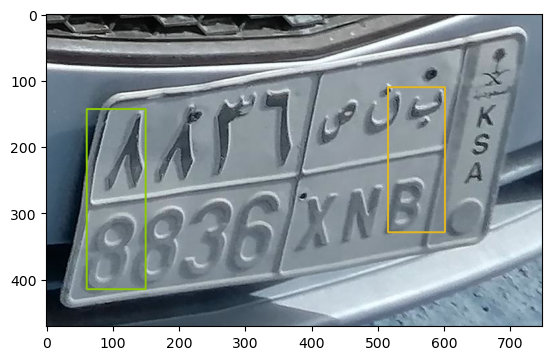

In [86]:
#ann_file = re.split('\|/', intersting_cases['ann_file'].head(1).item())[-1]#'ckictsenl0000246a2itn28ts.txt'
ann_file = intersting_cases['ann_file'].head(2).tail(1).item()[len(train_dir)+1:]
print(ann_file)

pic = cv2.imread(os.path.join(train_dir, ann_file.replace('.txt', '.jpeg')))
with open(os.path.join(train_dir, ann_file), 'r') as f:
    ann_data = f.readlines()
boxes, classes = get_boxes_classes_txt(ann_data)
pic_vis = plot_all_boxes(pic, boxes, classes)
plt.imshow(pic_vis)

with open(os.path.join(train_dir, ann_file), 'r') as f:
    ann_data = f.readlines()
boxes, classes = get_boxes_classes_txt(ann_data)
pic_vis = plot_all_boxes(pic, boxes, classes)
plt.imshow(pic_vis)

In [89]:
#tr_symb_freq['DS_part'].value_counts()
#te_symb_freq['DS_part'].value_counts()

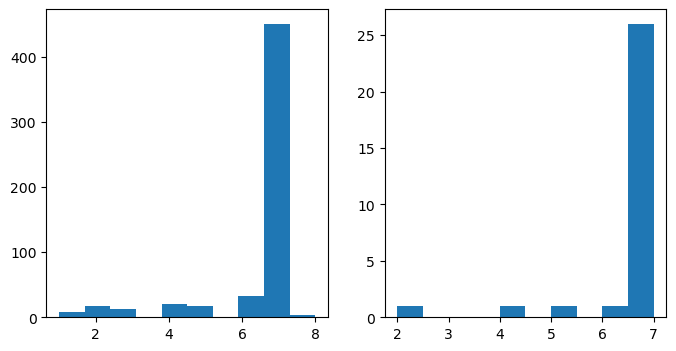

In [52]:
figure = plt.figure(figsize = (8,4))
plt.subplot(1, 2, 1)
tr_np = np.array(tr_symb_freq['DS_part'].reset_index())
#ax1 = tr_freq['DS_part'].reset_index().plot(kind='hist',\
#                    #kind = 'bar',
#                   #subplots=True,\
#                   sharex=True,sharey=True,title='train')

#ax1 = plt.bar(x= tr_np[:,0], height = tr_np[:,1])
ax1 = plt.hist(tr_np[:,1])
#ax1.title("train")
#ax2 = 
plt.subplot(1, 2, 2)
#ax2 = te_freq.plot.bar(x='class', y='DS_part', rot=0)
te_np = np.array(te_symb_freq['DS_part'].reset_index())
#te_freq.hist('DS_part')
ax2 = plt.hist(te_np[:,1])

In [ ]:
#usually 7 symbols annotated, some symbols are not labelled

## resolution distribution

## boxes centers distribution

## width, heightdistribution 